In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

In [882]:
data = loadmat('ex5data1.mat')
X, y, Xval, yval, Xtest, ytest = data['X'], data['y'].ravel(), data['Xval'], data['yval'].ravel(), data['Xtest'], data['ytest'].ravel()
X_original = X
Xval_original = Xval
Xtest_original = Xtest
#y = y.ravel()
m = X.size
mval = Xval.size
mtest = Xtest.size


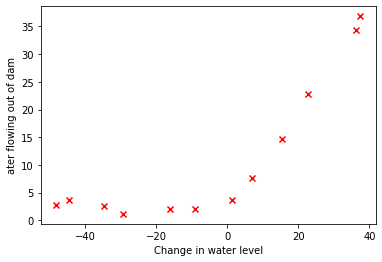

In [883]:
plt.scatter(X, y, marker='x', color= 'red')
plt.xlabel('Change in water level')
plt.ylabel('ater flowing out of dam')
plt.savefig('plot')


In [884]:
   def sigmoid(z):                #sigmoid function
        return 1/(1+np.exp(-z))

In [885]:
def h(theta, X):             #hypothesis function
    return np.dot(X, theta)

In [886]:
X = np.concatenate([np.ones((m,1)), X], axis=1)
Xval = np.concatenate([np.ones((mval,1)), Xval], axis=1)
Xtest = np.concatenate([np.ones((mtest,1)), Xtest], axis=1)
theta = np.array([1,1])

In [887]:
lambd = 0.1
def costFunction(X,y,theta,lambd):
    J = (np.sum(np.square(h(theta ,X) - y)))/(2*m) + lambd*np.sum(np.square(theta[1:]))/(2*m)
    grad = (1/m)*np.dot(h(theta,X) -y,X) + (lambd/m)*(theta)
    grad[0] = (1/m)*np.dot(h(theta,X) -y, X)[0]
    return J , grad

In [893]:
costFunction(X,y,theta,lambd)

(303.95569222026427, array([-15.30301567, 598.17574417]))

In [894]:
def trainLinearReg(costFunc, X,y,lambd):
    cost = lambda p : costFunc(X,y,p,lambd)
    options = {'maxiter': 100 }
    initial_theta = np.zeros(X.shape[1])
    res = minimize(cost, initial_theta, jac = True, method = 'TNC', options = options)
    return res.x

In [895]:
theta_final = trainLinearReg(costFunction, X,y,lambd)
theta_final

array([13.08788457,  0.36777551])

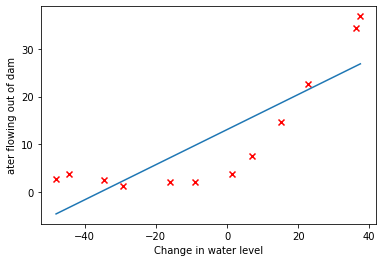

In [896]:
def plot(X,X_original, y, theta_final):
    plt.scatter(X_original, y, marker='x', color= 'red')
    sort = np.concatenate([X_original, h(theta_final,X).reshape(X_original.shape[0],1)] ,axis=1)
    sort = sort[sort[:,0].argsort()]
    plt.plot(sort[:,0], sort[:,1])
    plt.xlabel('Change in water level')
    plt.ylabel('ater flowing out of dam')
    
plot(X,X_original, y,theta_final)
#plt.savefig('Linear Regression plot')

In [897]:
h(theta_final,X)

array([ 7.22673529,  2.36613289, 26.39751413, 26.87659274, -4.58697575,
        9.79943536, 18.71771585,  0.3237701 , 13.59878153, -3.23537516,
       15.66727885, 21.45946608])

In [898]:
y

array([ 2.13431051,  1.17325668, 34.35910918, 36.83795516,  2.80896507,
        2.12107248, 14.71026831,  2.61418439,  3.74017167,  3.73169131,
        7.62765885, 22.7524283 ])

#                                             Bias- Variance

### Learning Curve

In [899]:
def learning_curve(X,y,X_val,y_val,lambd):
    error_train = []
    error_val = []
    for i in range(X.shape[0]):
        X_train = X[:i+1,:]
        y_train = y[:i+1]
        theta_train = trainLinearReg(costFunction, X_train,y_train,lambd)
        error_train.append(costFunction(X_train,y_train,theta_train,lambd)[0])
        error_val.append(costFunction(X_val,y_val, theta_train,lambd)[0])

    plt.plot(list(range(1,m+1)), error_train, label= 'Train')
    plt.plot(list(range(1,m+1)), error_val, label='Cross-Validation')
    plt.xlabel('no. of iterations')
    plt.ylabel('error')
    plt.legend()
    plt.savefig('Learning Curve')    
    

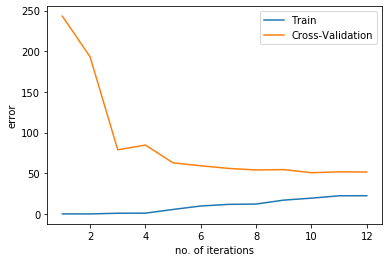

In [900]:
learning_curve(X,y,Xval,yval,lambd)
#plt.savefig('Learning Curve(lambda = 100)  X_original, High Bias')

In [901]:
#Polynomial_feature
def poly_features(X, p):
    X_polyf = np.zeros((X.shape[0],p))
    #X_polyf = np.concatenate([np.ones((X.shape[0],1)), X_polyf], axis=1)
    for i in range(p):
        X_polyf[:,i] = X[:,1]**(i+1)
    return X_polyf    

In [902]:
p=8
X_poly, Xval_poly, Xtest_poly = poly_features(X,p) , poly_features(Xval,p) , poly_features(Xtest,p)
#X_poly

In [903]:
#Feature_Normalization
def normalize(X):
    mean = np.mean(X, axis=0)
    min_ = np.min(X, axis=0)
    max_ = np.max(X, axis=0)
    normalized_poly = (X -mean)/(max_-min_)
    return np.concatenate([np.ones((X.shape[0],1)), normalized_poly], axis=1)


In [904]:
X_poly, Xval_poly, Xtest_poly = normalize(X_poly) , normalize(Xval_poly) , normalize(Xtest_poly)
#theta_poly = trainLinearReg(costFunction, X_poly,y)
#X_poly

In [905]:
theta_poly = trainLinearReg(costFunction, X_poly,y,lambd)

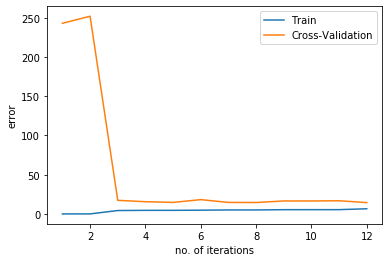

In [906]:
learning_curve(X_poly,y,Xval_poly,yval,lambd)
#plt.savefig('Learning Curve(lambda = 100)  X_poly High_Bias Highly_Underfit')

In [924]:
#Training Set
costFunction(X_poly,y,theta_poly,lambd)

(6.573486627963727,
 array([ 3.59047337e-07, -2.32523413e-07,  1.44441204e-07, -4.49054861e-07,
         2.69794361e-07, -5.34075773e-08,  2.04690998e-07, -1.47446856e-07,
         3.79074414e-07]))

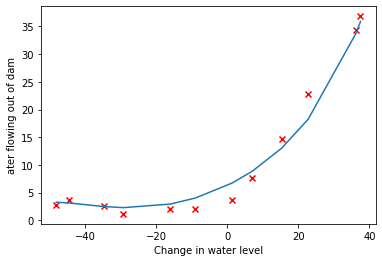

In [907]:
plot(X_poly,X_original, y,theta_poly)
#plt.savefig('plot X_poly8(lambda = 100) High Bias Underfit')

In [909]:
#cross validation set
costFunction(Xval_poly,yval,theta_poly,lambd)

(14.418471370325392,
 array([-2.95573982, -0.45273357,  0.38398546, -0.47450286,  0.33144621,
        -0.46758066,  0.32336933, -0.45646808,  0.32643132]))

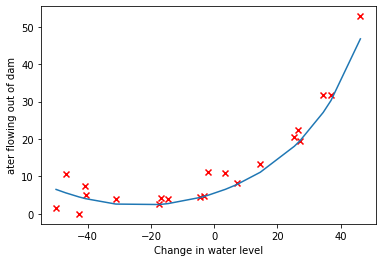

In [910]:
#plot of cross validation set
plot(Xval_poly,Xval_original, yval, theta_poly)
#plt.savefig('plot Xval_poly8(lambda = 100)')

In [911]:
#test set
costFunction(Xtest_poly,ytest,theta_poly,lambd)

(27.770295761594312,
 array([-3.90569194, -1.40681346, -0.28139926, -1.00506323, -0.08354833,
        -0.73742088,  0.04236692, -0.54820563,  0.10593085]))

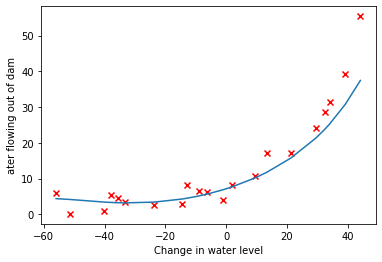

In [912]:
#plot of test set
plot(Xtest_poly,Xtest_original, ytest, theta_poly)
#plt.savefig('plot Xtest_poly8(lambda = 100)')

In [913]:
theta_poly

array([11.21758968, 26.65016135, 16.37790516, 10.05726861,  6.41892161,
        5.19525724,  2.51891062,  3.55411097,  0.50328626])

In [921]:
#Selecting Regularization Parameter using Cross-Validation Set
train_error = []
cv_error = []
arr = [(0.001)*(3**x) for x in range (7)]
for i in arr:
    train_theta = trainLinearReg(costFunction, X_poly,y,i)
    train_error.append(costFunction(X_poly,y,train_theta,i)[0])
    cv_error.append(costFunction(Xval_poly,yval,train_theta,i)[0])                       


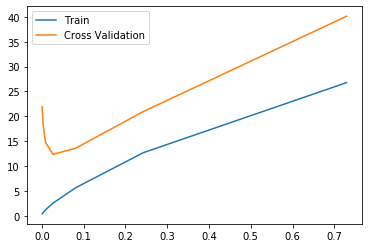

In [927]:
plt.plot(arr, train_error, label = 'Train')
plt.plot(arr, cv_error ,label= 'Cross Validation')
plt.legend()
#plt.savefig('Selecting Regularization Parameter')